In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
dataset.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [7]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
# Feature Column
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glucose_conc = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
class_labels = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [10]:
import matplotlib.pyplot as plt

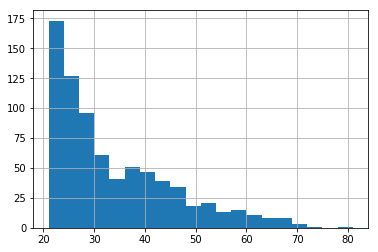

In [11]:
dataset['Age'].hist(bins=20)
plt.show()

In [12]:
age = tf.feature_column.bucketized_column(age, [20,30,40,50,60,70,80])

In [13]:
featured_columns = [num_preg, glucose_conc, blood_pressure,triceps,insulin,
                   bmi,pedigree,age]

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [15]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [18]:
print(x_train.shape)
print(x_test.shape)

(537, 9)
(231, 9)


In [19]:
input_data = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=10,
                                    num_epochs=1000,shuffle=True)

In [20]:
model = tf.contrib.learn.LinearClassifier(featured_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\asus\\AppData\\Local\\Temp\\tmp8bw44qnc', '_num_ps_replicas': 0, '_task_id': 0, '_evaluation_master': '', '_session_config': None, '_task_type': None, '_is_chief': True, '_environment': 'local', '_save_summary_steps': 100, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000211C0DAAE48>}


In [21]:
model.fit(input_fn=input_data, steps = 1000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\asus\AppData\Local\Temp\tmp8bw44qnc\model.ckpt.
INFO:tensorflow:loss = 0.693147, step = 1
INFO:tensorflow:global_step/sec: 292.327
INFO:tensorflow:loss = 0.749361, step = 101 (0.355 sec)
INFO:tensorflow:global_step/sec: 271.708
INFO:tensorflow:loss = 0.649241, step = 201 (0.361 sec)
INFO:tensorflow:global_step/sec: 284.873
INFO:tensorflow:loss = 0.540218, step = 301 (0.356 sec)
INFO:tensorflow:global_step/sec: 275.438
INFO:tensorflow:loss = 0.509743, step = 401 (0.363 sec)
INFO:tensorflow:global_step/sec: 263.882
INFO:tensorflow:loss = 0.447926, step = 501 (0.380 se

LinearClassifier(params={'optimizer': None, 'gradient_clip_norm': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x00000211BE267860>, 'joint_weights': False, 'feature_columns': [_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _BucketizedColumn(source_column=_Nume

In [22]:
eval_input_data = tf.estimator.inputs.pandas_input_fn(x_test, y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [23]:
result = model.evaluate(eval_input_data)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


AttributeError: 'function' object has no attribute 'dtype'